<a href="https://colab.research.google.com/github/AHamamd150/ML_Course_BUE/blob/main/BUE_2024/codes/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now we understand how to do a linear regression, which is the basic part in any deep neural network.


# Now we understand how to do a linear regression, which is the basic part in any deep neural network.


In [ ]:
import os # To use the system comands in python
import matplotlib.pyplot as plt # plotting library
import numpy as np  #Numerical python liberary
import pandas as pd #Data handeling python module
plt.style.use('seaborn')

<ipython-input-1-1e96f278e706>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

* train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)



**Load the data from keras**

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
data = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Split the data into training dataset (to train the neural network) and test dataset (to test the neural network performance)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Important: Check the shape of each dataset

In [ ]:
print(f'Dimension of the training dataset: {x_train.shape},  Dimension of the training dataset:  {x_test.shape}')

Dimension of the training dataset: (60000, 28, 28),  Dimension of the training dataset:  (10000, 28, 28)


Visualize, visualize, visualize,.....

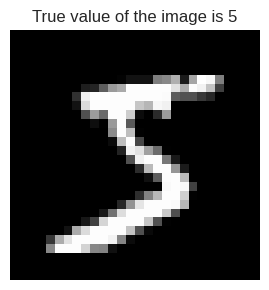

In [ ]:
fig = plt.figure(figsize=(3,3))
plt.imshow(x_train[0],cmap='gray');
plt.axis('off')
plt.title('True value of the image is %s'%(y_train[0]))
plt.tight_layout()


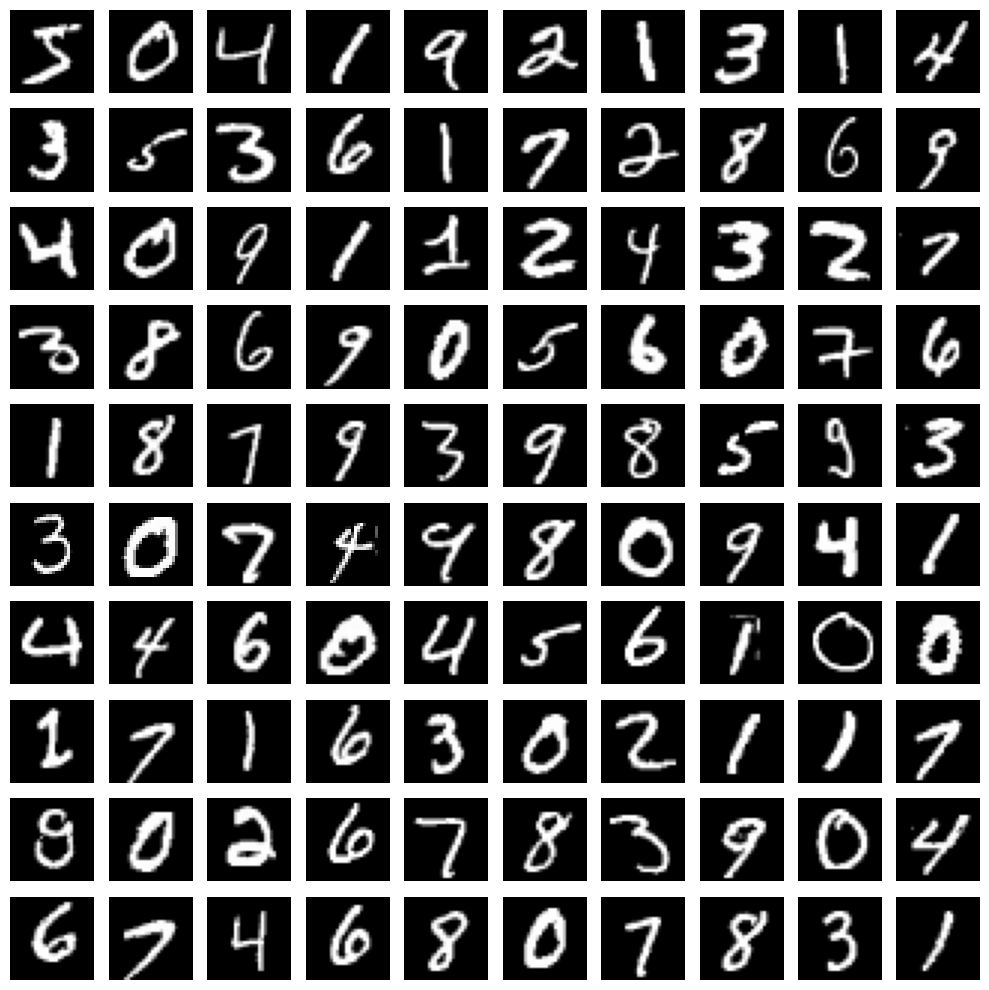

In [ ]:
fig = plt.figure(figsize=(10,10))
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_train[q],cmap='gray');
  plt.axis('off')
  plt.tight_layout()


⛔⛔⛔ Note That:

If your data has different scale, the network will not be able to converge to the global minimum. Normaliztion of the input data is manditory.



Let's see the pixles value of the input images

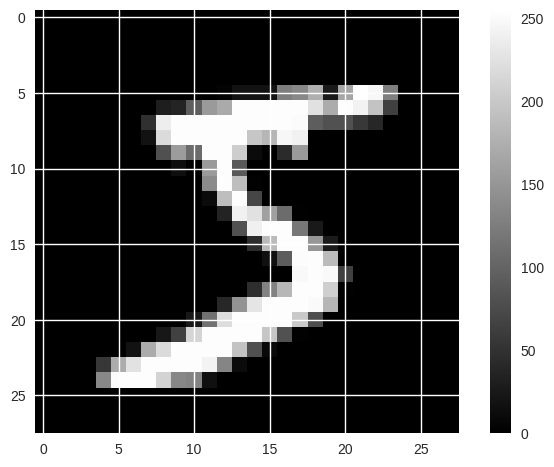

In [ ]:
plt.imshow(x_train[0],cmap='gray');
plt.colorbar();

Minimum value is zero while the maximum value is 255... We need to normalize these

In [ ]:
x_train=x_train.reshape(-1,28,28,1)/255;
x_test=x_test.reshape(-1,28,28,1)/255;

In [ ]:
print('Maximum Value of the image= {} and Minimum value of the image= {}'.format(x_train.max(),x_train.min()))

Maximum Value of the image= 1.0 and Minimum value of the image= 0.0


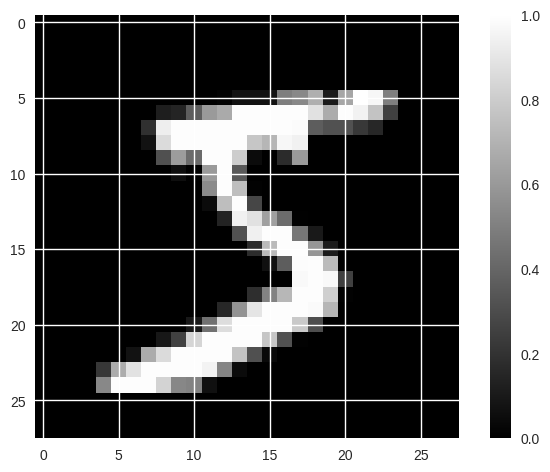

In [ ]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray');
plt.colorbar();

# Bingo!! Now we can proceed with the analysis

What about the labels ? we need the labels to be 0 or 1 .. lets check our labels

In [ ]:
print(f'Labels of the first twinty elements are :   {y_train[:20]}')

Labels of the first twinty elements are :   [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


mmmmm, this is not good.. Adjusting the lables using  **One hot encoding**

In [ ]:
y_train1=keras.utils.to_categorical(y_train,10)
y_test1=keras.utils.to_categorical(y_test,10)

In [ ]:
tt=pd.DataFrame(y_train1)
tt['label']=y_train
tt.head(10)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4


# Up to here we have every thing ready. Let's construct the neural network

In [ ]:
from tensorflow import keras
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28,1)),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(265,activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(10,activation='softmax') # 10 neurons for the 10 digits and Softmax because off the multiclass calssification
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 265)               135945    
                                                                 
 dropout_1 (Dropout)         (None, 265)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               34048     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

# Plot the network

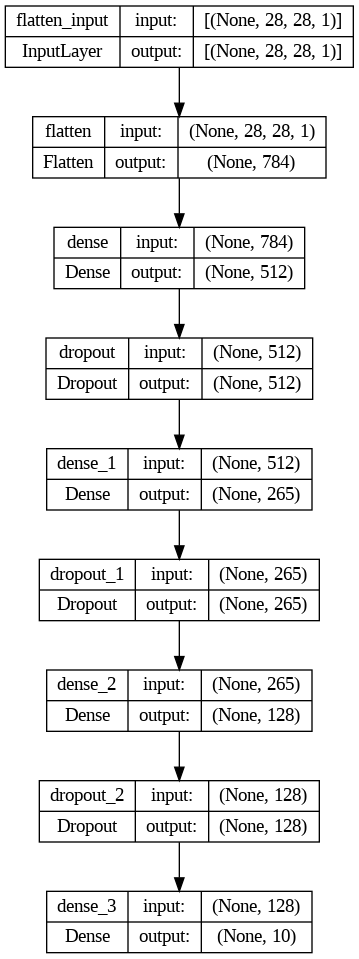

In [ ]:
keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

# Compile and train the network

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='CategoricalCrossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train1,epochs=20,batch_size=1000,validation_split=0.2)


Epoch 1/20
48/48 [==============================] - 8s 27ms/step - loss: 0.5945 - accuracy: 0.8105 - val_loss: 0.1707 - val_accuracy: 0.9504
Epoch 2/20
48/48 [==============================] - 1s 13ms/step - loss: 0.1791 - accuracy: 0.9486 - val_loss: 0.1276 - val_accuracy: 0.9615
Epoch 3/20
48/48 [==============================] - 0s 10ms/step - loss: 0.1338 - accuracy: 0.9601 - val_loss: 0.1085 - val_accuracy: 0.9680
Epoch 4/20
48/48 [==============================] - 1s 13ms/step - loss: 0.1185 - accuracy: 0.9663 - val_loss: 0.1008 - val_accuracy: 0.9722
Epoch 5/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0993 - accuracy: 0.9705 - val_loss: 0.0983 - val_accuracy: 0.9707
Epoch 6/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0912 - accuracy: 0.9736 - val_loss: 0.1064 - val_accuracy: 0.9719
Epoch 7/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.0952 - val_accuracy: 0.9745
Epoch 8/20
48/

# Test the network performance on new unseen data

In [ ]:
scores = model.evaluate(x_test, y_test1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.76%


# Plot the model performance at each of the training epochs

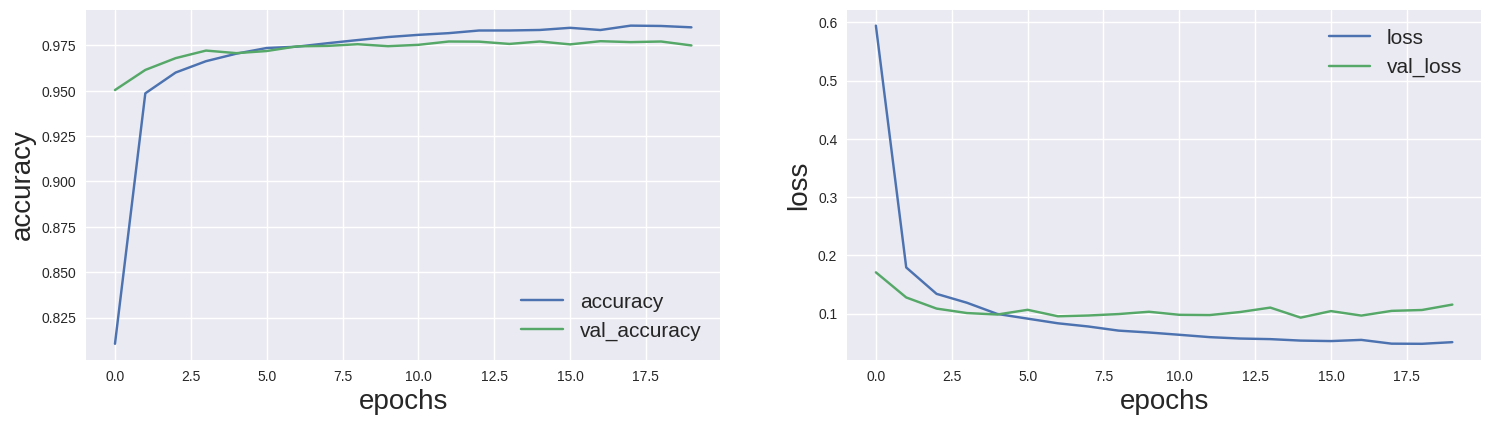

In [ ]:
fig=plt.figure(figsize=(18,10))
fig.add_subplot(2,2,1)
plt.plot(history.history['accuracy'],label='accuracy');
plt.plot(history.history['val_accuracy'],label='val_accuracy');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('accuracy',fontsize=20);
plt.legend(loc='best',fontsize=15);
fig.add_subplot(2,2,2)
plt.plot(history.history['loss'],label='loss');
plt.plot(history.history['val_loss'],label='val_loss');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('loss',fontsize=20);
plt.legend(loc='best',fontsize=15);

# Finally, prediction

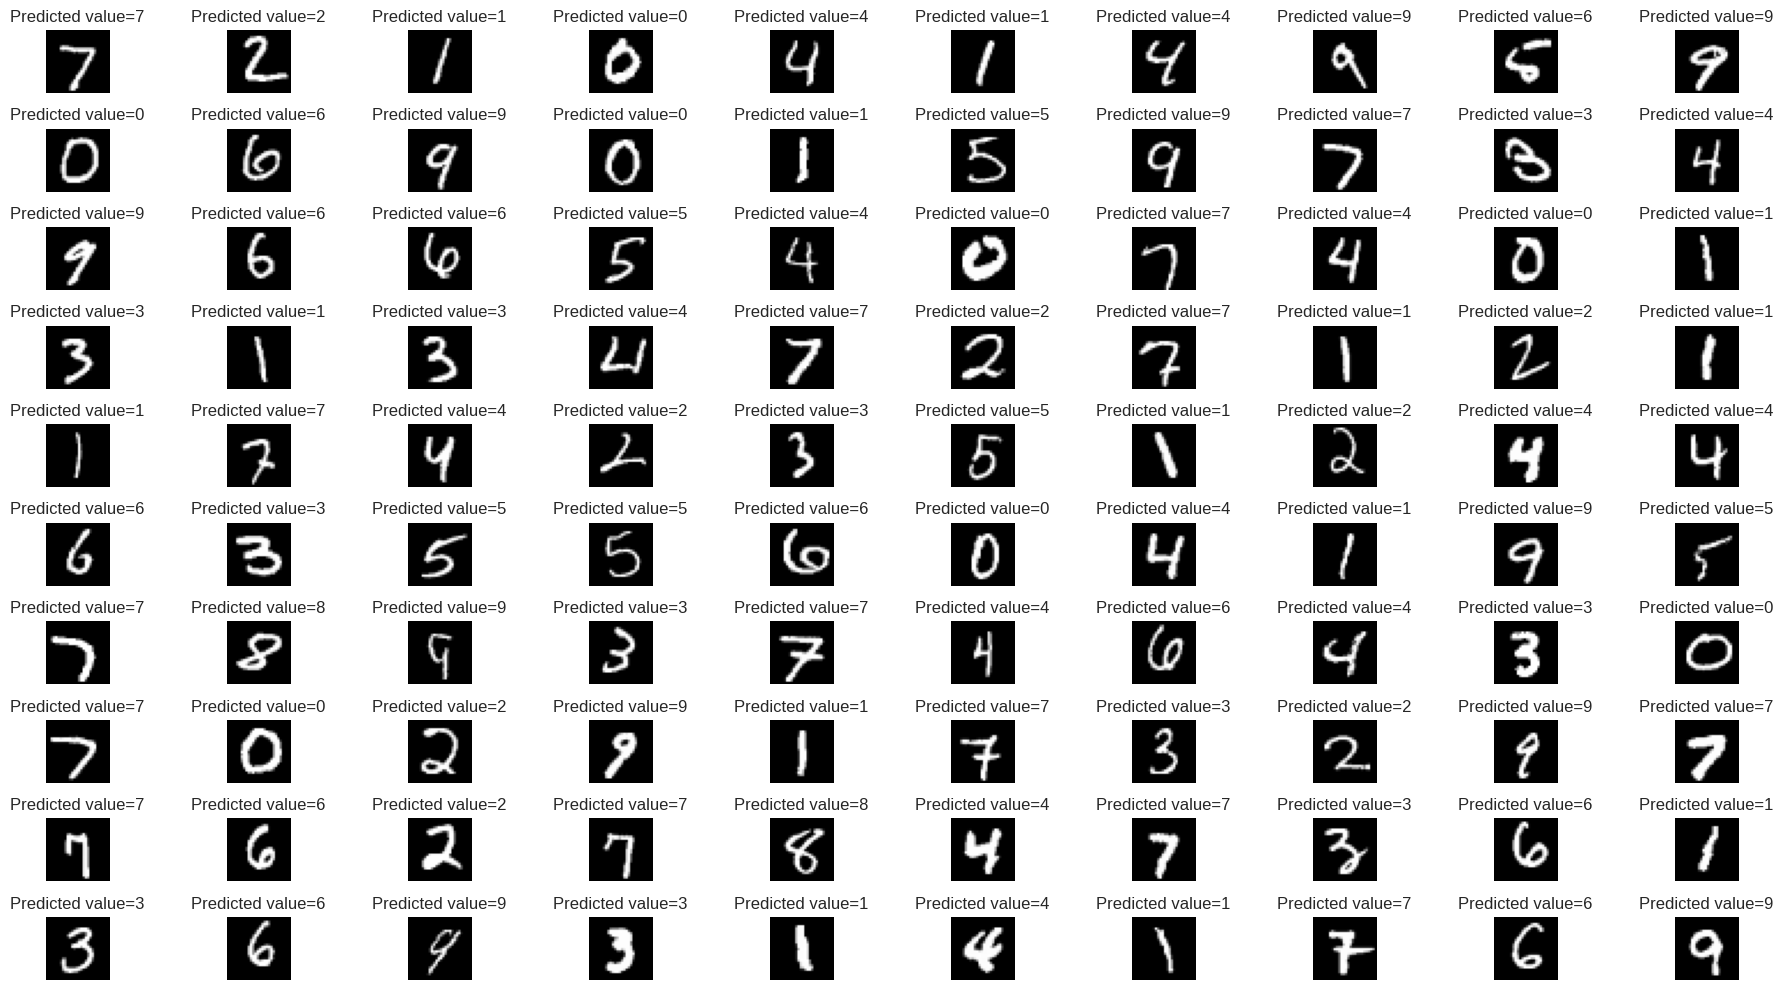

In [ ]:
fig = plt.figure(figsize=(20,10))
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_test[q].reshape(28,28),cmap='gray');
  plt.axis('off')
  pred=model.predict(x_test[q].reshape(-1,28,28,1),verbose=0).argsort()
  plt.title('Predicted value={}'.format(pred.ravel()[-1]))
  plt.tight_layout();